# 2. 非線形回帰モデル

本書は、機械学習レポートの、非線形回帰モデルについてです。


# 1.1. 要点まとめ


単回帰の時の、回帰係数は、

$$
\textbf{w} = ( X^TX )^{-1} \cdot X^T \cdot \textbf{y} \\
$$

これが、非線形回帰モデルの場合は、以下となる。

$$
\textbf{w} = ( \Phi^T\Phi )^{-1} \cdot \Phi^T \cdot \textbf{y} \\
$$


例えば、 2 次の $ x $ の関数まで具体化して書くと、以下の通り。

$$
\hat{w}
=
(
\begin{pmatrix}
1 & x_{11} & x_{12}^2 \\
1 & x_{21} & x_{22}^2
\end{pmatrix}^T
\begin{pmatrix}
1 & x_{11} & x_{12}^2 \\
1 & x_{21} & x_{22}^2
\end{pmatrix}
)^{-1}
\begin{pmatrix}
1 & x_{11} & x_{12}^2 \\
1 & x_{21} & x_{22}^2
\end{pmatrix}^T
\begin{pmatrix}
y_{1} \\
y_{2}
\end{pmatrix}
$$

ここは、 $ X $ の部分が、 $ \Phi $ 、つまり、個々の要素が $ \Phi(x)$ で計算された行列式と理解。


単回帰では、 $ x $ であったところを、代わりに $ \Phi(x) $ を用いる。 ( $ \Phi(x) $ は $ x $ の任意の関数 )<br>
ここで、 $ x $ が $ \phi(x) $ に代わっても、 $ \textbf{w} $ については線形のままである。<br>
重み $ \textbf{w} $ について線形とは、 liner-in-parameter という。


基底関数 $ \phi(x) $ の種類に、 Gauss 型基底関数がある。

$$
\phi_j(x) = exp{-\frac{(x - \mu_j)^2}{2h_j}} \\
=
exp{-\frac{(x - \mu_j)^2}{\sigma~2}}
$$

ある点 $ \mu_1, \mu_2 $ と、 $ x_i $ の距離を、
$ 2h_j, \sigma^2 $ の広がりでコントロールしている。


"非線形関数の計画行列" の $ n \times k $ の行列を書くと、


単回帰では、

$$
\hat{\boldsymbol{y}} = X\boldsymbol{w}
=
\begin{pmatrix}
1 & x_{11} & x_{12} & \dots & x_{1m} \\
1 & x_{21} & x_{22} & \dots & x_{2m} \\
\dots \\
1 & x_{n1} & x_{n2} & \dots & x_{nm}
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
\dots \\
w_{m}
\end{pmatrix}
$$


今回の多項式回帰では、

$$
\hat{\boldsymbol{y}} = \boldsymbol{\phi}(\boldsymbol{x})\boldsymbol{w}
=
\begin{pmatrix}
1 & \phi_1(x_{11}) & \phi_2(x_{12}) & \dots & \phi_m(x_{1m}) \\
1 & \phi_1(x_{21}) & \phi_2(x_{22}) & \dots & \phi_m(x_{2m}) \\
\dots \\
1 & \phi_1(x_{n1}) & \phi_2(x_{n2}) & \dots & \phi_m(x_{nm})
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
\dots \\
w_{m}
\end{pmatrix}
$$


MSE を最小する $ \textbf{w} $ は、単回帰と同様に、


$$
\hat{\textbf{w}} = (X^T X)^(-1) X^T \textbf{y} \\
\to
\hat{\textbf{w}} = (\Phi^T \Phi)^{-1} \Phi^T \textbf{y} \\
\therefore
\hat{\textbf{y}} = \Phi_{*} \cdot \hat{\textbf{w}}
=
\Phi_{*} \cdot (\Phi^T \Phi)^{-1} \Phi^T \textbf{y} \\
$$

と、予測値が得られる。


過学習の対策は、以下の 3 つ。

1. 学習データの数を増やす
2. 不要な基底関数(変数)の削除<br>Cross Validation などて選択する。
3. 正則化法の利用<br>
モデルの複雑さで値が大きくなる罰則項を追加する。


正則化法では、 $ J(\textbf{w} ) $ を MSE とすして、以下の目的関数に罰則項を追加すること。

$$
E(\textbf{w}) = J(\textbf{w}) + \lambda \cdot \textbf{w}^T \textbf{w}
$$

$ \textbf{w} $ が大きくなると、罰則項が大きくなるので、目的関数の最小化をする中で、
MSE を最小化しつつ、 $ \textbf{w} $ も最小化する。

- 縮小推定
  - Ridge 推定量<br>
  L2 ノルムを使用。パラメータを 0 に近づけるように推定

- スパース推定
  - Lasso 推定量<br>
  L1 ノルムを使用。いくつかのパラメータを正確に 0 に推定。


解きたいのは、 $ min MSE s.t. R(\textbf{w}) \le r $ 。不等式条件のある最適化問題。<br>
KKT 条件を使うと、<br>
$$
min MSE + \lambda \cdot R(\textbf{w})
$$

スライド ( page.41 ) のグレーの範囲は、 $ R(\textbf{w}) $ の範囲のこと。<br>
右上の楕円は、 MSE のこと。最初は黒丸であるが、そこを広げて、<br>
( 等高線の様に楕円が広がっていって、)<br>
グレーの範囲と接したところを最適解とする。


正則化を行ったグラフの方が滑らかに近似し、正則化していないで、基底関数が多いグラフと比べてオーバーフィッティングしていないことが分かる。
( スライド page.42 )


正則化法のパラメータ $ \gamma ( \gamma \gt 0 ) $ はハイパーパラメータ。

汎化性能、バイアス・バリアンス分解の内容に入る。 ( 講義: 59:23 )

- バイアス・バリアンス分解<br>
[バイアス-バリアンス分解：機械学習の性能評価 - HELLO CYBERNETICS](https://www.hellocybernetics.tech/entry/2017/01/24/100415)<br>
スライド page. 45 のリンクの内容を確認した。バイアスとバリアンスはトレードオフの関係にあり、バランスの取れた正則化パラメータの調整が必要と理解した。 <br>
  - バイアス: 未学習に対する指標<br>
  正則化項のパラメータを大きくすると、上昇。
  > モデルが単純であるあまりに学習が上手くいかない度合い
  - バリアンス: 過学習に対する指標<br>
  正則化項のパラメータを大きくすると、低下。
  > 訓練データに依存し過ぎることで新しいデータへの予測が悪化する度合い


- NOTE: 参考: [Deep Double Descent](https://openai.com/blog/deep-double-descent/)<br>
ディープラーニングの場合は、学習を続けると汎化性能も上がり始める。


学習用とテスト用で、データを分割する方法は、以下の 3つ。

1. ホールドアウト
2. クロスバリデーション(交差検証)<br>
チューニングパラメータは固定。モデルを変えて、 CV値(精度の平均) が良いモデルを試行する。

講義中の質問( 講義: 1:10:53 ) より、学習誤差と検証誤差は同じもの(MSEならば、MSE)を使うのが望ましいとのこと。


グリッドサーチ。( 講義: 1:15:04 )

- NOTE: [Hyperparameter optimization - Wikipedia](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Bayesian_optimization) などがある。


- NOTE: [赤池情報量規準 - Wikipedia](https://ja.wikipedia.org/wiki/%E8%B5%A4%E6%B1%A0%E6%83%85%E5%A0%B1%E9%87%8F%E8%A6%8F%E6%BA%96)
<br>
講義中、モデルの評価をする上で紹介された手法。
AIC: モデルと特徴量の数の、妥当性を測るもの。


# 1.2. 実装演習


## np_regression.ipynb

`np_regression.ipynb` の "多項式回帰" について、実装演習を行った。<br>
自身の実行環境で、実行を確認したキャプチャは、 [1. 線形回帰モデル のレポート](https://render.githubusercontent.com/view/ipynb?color_mode=auto&commit=ac163a3a101e84738bcd27c9651901788aad2836&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f796f7368696e616b2f73747564792d61692d73746167652d322f616331363361336131303165383437333862636432376339363531393031373838616164323833362f315f6c696e6561725f72656772657373696f6e2e6970796e62&nwo=yoshinak%2Fstudy-ai-stage-2&path=1_linear_regression.ipynb&repository_id=427871847&repository_type=Repository#%E3%82%AD%E3%83%A3%E3%83%97%E3%83%81%E3%83%A3) の通り。


##### 多項式回帰

学習の( コードセル[8]の下 )、数式について、確認した。

$ y(x) = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)} $ について、

$ w^T $ は列 ベクトル。<br>
$ \phi(x) $ は行 ベクトル。

よって、

$$
\boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)}
=
w_0 + w_1x + w_2x^2 + \dots + w_dx^d
$$


講義の中では、 $ \Phi_1, \Phi_2 $ の例だった。
これを講義の、少し前の説明での 9 乗までの $ \Phi_9 $ に倣って、書いてみると、


$$
=
\begin{pmatrix}
1 & x_{11} & x_{12}^2 \\
1 & x_{21} & x_{22}^2
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\end{pmatrix}
$$

コードセル[9] の`polynomial_features()` の結果から、上記の様に理解する。


## skl_nonlinear regression.ipynb


### キャプチャ

自身の環境において、最終コードセル[52]までの実行を確認した。


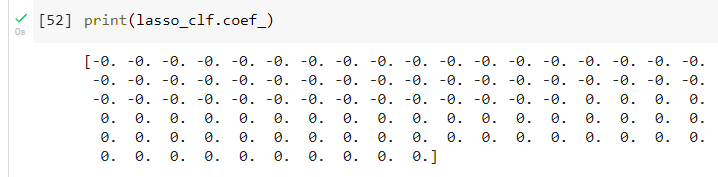

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


##### LinearRegression

コードセル[6] において、以下のコードを追加し、モデルのパラメータと $ X $ のランクを確認した。

```
params = clf.get_params()
print("params={}".format(params))
...
print("Rank of matrix X: clf.rank_={}".format(clf.rank_))
```

```
params={'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
(100, 1)
Rank of matrix X: clf.rank_=1
```



##### KernelRidge

ドキュメントを確認。 L2 正則化とカーネル回帰を組合せたものと理解した。

- [sklearn.kernel_ridge.KernelRidge — scikit-learn 1.0.1 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)

また、以下より、過学習になりやすいカーネル回帰の汎化性能を高めるために、 L2 正則化を行うことを確認した。

- [カーネル法入門｜カーネル回帰とカーネルリッジ回帰 | マサムネの部屋](https://masamunetogetoge.com/kernelpart1)<br>
( 前半部、表示が崩れているが、後半に説明がある )


##### Ridge

`score` の計算方法にについて、確認した。

- [sklearn.linear_model.LinearRegression — scikit-learn 1.0.1 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)<br>
決定係数のこと。


##### PolynomialFeatures

講義の中では 4 次がちょうどよい話。ここで得られたグラフにおいても、以下の様に 5 以降を表示しなくても、4 次で充分近似するグラフを得た。

```
# deg = [1,2,3,4,5,6,7,8,9,10]
deg = [1,2,3,4]
for d in deg:
```


##### Lasso

講義の中の L1 ノルムを使用した正則化。
今回の例では、結果のグラフは直線であり、採用にあたって効果はなかったものと理解した。


##### SVR-rbf

サポートベクトルマシンを使用した、サポートベクトル回帰。<br>
ドキュメントを確認し、通常、 `kernel='rbf'` の選択が近似しやすいと理解した。

- [Support Vector Regression (SVR) using linear and non-linear kernels — scikit-learn 1.0.1 documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)


##### keras

グラフのタイトルより、 `NonLiner Regressions via DL by ReLU` 。
コードでは、以下でモデルを作成していると理解。

```
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)
```

グラフより精度の高い結果を得た。

- NOTE: 実行時、 2 GiB 超の領域が、 Google Drive に必要。
